<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_10/Module_10_1_Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN, Згорткові нейронні мережі)

![cnn](https://learnopencv.com/wp-content/uploads/2023/01/Convolutional-Neural-Networks-1024x611.png)

Data source: MNIST http://yann.lecun.com/exdb/mnist/

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


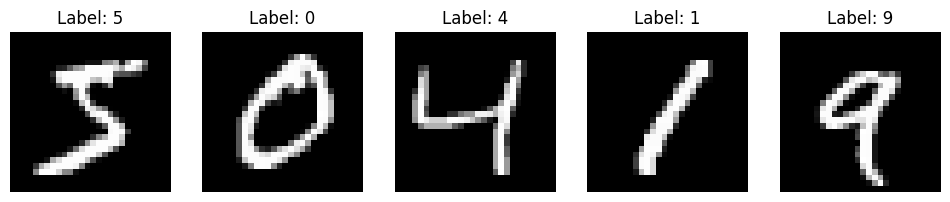

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display a few sample images
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

print(train_images[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

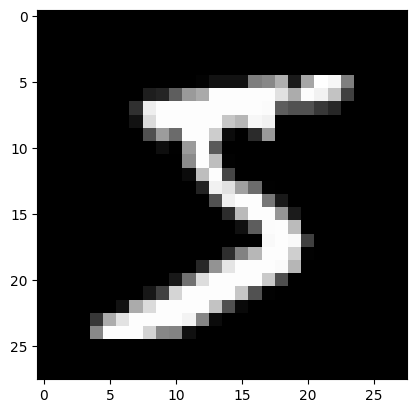

In [9]:
plt.imshow(train_images[0], cmap='gray')

In [11]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Convolutions

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

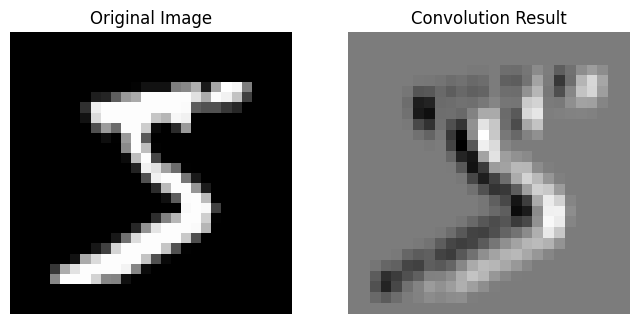

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# layers.Conv2D

def conv2d(image, kernel):  # kernels = filters
    # Extract dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Initialize the output with zeros
    output = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of the image that corresponds to the current convolution window
            image_patch = image[i:i + kernel_height, j:j + kernel_width]

            # Element-wise multiplication and summation
            output[i, j] = np.sum(image_patch * kernel)

    return output

# Load a sample image - "5"
image = train_images[0]

# Define a simple convolutional filter (Sobel edge detection filter)
# https://uk.wikipedia.org/wiki/Оператор_Собеля
sobel_filter = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

# Normalize the filter to ensure it doesn't affect the scale of the gradients
sobel_filter = sobel_filter / 4.0

# Apply the convolution
result = conv2d(image, sobel_filter)

# Plot the original image and the convolution result
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')
plt.axis('off')

plt.show()


In [14]:
# Reminder
"""
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),

    # num_params: kernel_dim * n_neurons + n_bias = (3*3)*32 + 32 = 9*32 + 32 = 288 + 32 = 320
    # output: image_length - kernel_length + 1 , image_width - kernel_width + 1 , n_neurons
...
])
"""
# The filters are learned during the training process.
# As the model processes training examples, the filters' weights are adjusted to capture relevant features
# for the given task, which in your case is likely image classification on the MNIST dataset (handwritten digit recognition).
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Max Pooling

https://paperswithcode.com/method/max-pooling

tf.Tensor([26 26  1], shape=(3,), dtype=int32)
tf.Tensor([13  2 13  2  1], shape=(5,), dtype=int32)


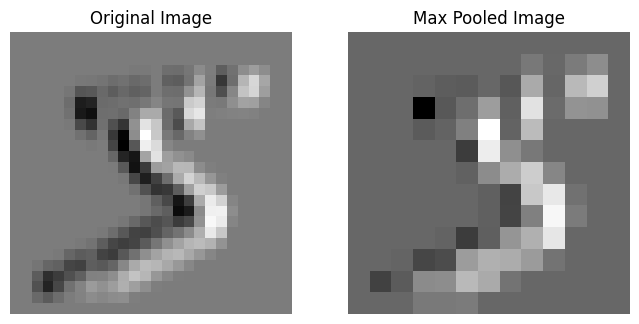

In [13]:
# Select one example from the dataset
# image = train_images[0]
image = result
image = np.expand_dims(image, axis=-1)  # Add channel dimension

# layers.MaxPooling2D((2, 2))
# Define max pooling function
def max_pooling_2d(input_tensor, pool_size):
    input_shape = tf.shape(input_tensor)
    print(input_shape)
    input_height, input_width, num_channels = input_shape[0], input_shape[1], input_shape[2]

    output_height = input_height // pool_size
    output_width = input_width // pool_size

    # Reshape the input tensor to prepare for max pooling
    reshaped_input = tf.reshape(input_tensor, [output_height, pool_size, output_width, pool_size, num_channels])
    input_shape_after_reshaping = tf.shape(reshaped_input)
    print(input_shape_after_reshaping)

    # Take the max along the pooling window dimensions
    pooled_tensor = tf.math.reduce_max(reshaped_input, axis=[1, 3])

    return pooled_tensor

# Perform max pooling with a pool size of 2x2
pool_size = 2
pooled_image = max_pooling_2d(image, pool_size)

# Plot the original and pooled images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(pooled_image), cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')

plt.show()


In [15]:
#print(pooled_image)
print(tf.transpose(pooled_image))

tf.Tensor(
[[[0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 -61.5 0]
  [0 0 0 0 0 0 0 0 0 0 -4.5 -20.2 0]
  [0 0 -7.5 -170 -20 0 0 0 0 0 -53.5 59 29.5]
  [0 0 -16 -24.2 -7.25 0 0 0 0 -6 -44.5 61.8 29.8]
  [0 0 -20.5 12 40 -70 -8.75 0 0 -68.8 87.2 135 33]
  [0 0 0 88 250 219 60.8 -11.2 -11.5 -12.5 120 110 0]
  [0 0 -27 -12.2 -7.5 64.8 113 -59 -57.5 75 113 20 0]
  [0 27.5 110 201 137 27 167 159 40.8 119 84.2 0 0]
  [0 2.25 -2.5 6.5 0 0 50 211 235 207 19.5 0 0]
  [0 32 135 72.5 0 0 0 16 32.5 0.5 0 0 0]
  [0 61.8 172 68.2 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0]]], shape=(1, 13, 13), dtype=float64)


In [16]:
print(tf.transpose(image))

tf.Tensor(
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -13.8 -61.5 -81.8 -34 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -43 -149 -170 -63.2 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -4.5 -51.8 -119 -101 -29.2 0]
  [0 0 0 0 0 -12.2 -29 -21.2 -4.5 0 0 0 0 0 0 0 0 0 0 0 -42.8 -106 -83.2 -20.2 0 0]
  [0 0 0 0 -7.5 -74.5 -181 -189 -94.8 -20 0 0 0 0 0 0 0 0 0 -5.75 -61.8 -113 -53.5 13.8 10.2 0]
  [0 0 0 0 -9 -69 -170 -208 -140 -46 -3.5 0 0 0 0 0 0 0 0 -16.5 -53.5 -57.5 9 59 29.5 0]
  [0 0 0 0 -16 -35.8 -32 -27.5 -22.2 -7.25 -0.25 0 0 0 0 0 0 0 -6 -59.5 -110 -64.5 11.5 40 20 0]
  [0 0 0 0 -29.5 -59 -29.5 -24.2 -83.5 -129 -107 -40.2 -2.75 0 0 0 0 0 -28.5 -104 -122 -44.5 34.2 61.8 29.8 0]
  [0 0 0 -0.75 -20.5 -38.8 -19 -36.5 -136 -226 -237 -167 -65 -8.75 0 0 0 -9.75 -68.8 -118 -69.2 20 93 96 33 0]
  [0 0 0 -4.5 -33.8 -54 -24.8 12 40 31.2 -70 -194 -201 -101 -20.2 0 0 -37 -109

In [17]:
pooled_image[:, :, 0]

<tf.Tensor: shape=(13, 13), dtype=float64, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 27.5, 2.25, 32, 61.8, 0],
       [0, 0, 0, -7.5, -16, -20.5, 0, -27, 110, -2.5, 135, 172, 0],
       [0, 0, 0, -170, -24.2, 12, 88, -12.2, 201, 6.5, 72.5, 68.2, 0],
       [0, 0, 0, -20, -7.25, 40, 250, -7.5, 137, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, -70, 219, 64.8, 27, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, -8.75, 60.8, 113, 167, 50, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, -11.2, -59, 159, 211, 16, 0, 0],
       [0, 0, 0, 0, 0, 0, -11.5, -57.5, 40.8, 235, 32.5, 0, 0],
       [0, 0, 0, 0, -6, -68.8, -12.5, 75, 119, 207, 0.5, 0, 0],
       [0, 0, -4.5, -53.5, -44.5, 87.2, 120, 113, 84.2, 19.5, 0, 0, 0],
       [0, -61.5, -20.2, 59, 61.8, 135, 110, 20, 0, 0, 0, 0, 0],
       [0, 0, 0, 29.5, 29.8, 33, 0, 0, 0, 0, 0, 0, 0]])>

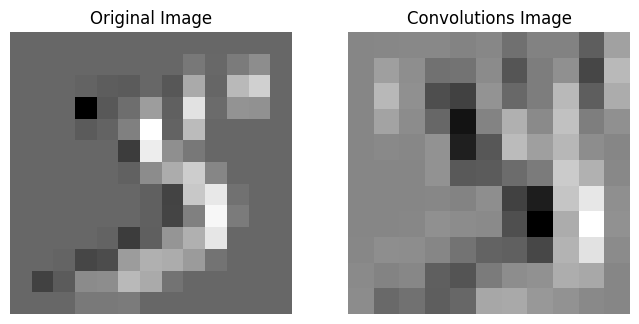

In [18]:
# Another convolution layer
result_2 = conv2d(pooled_image[:, :, 0], sobel_filter)

# Plot the original image and convolutions
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(pooled_image[:, :, 0]), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(result_2), cmap='gray')
plt.title('Convolutions Image')
plt.axis('off')

plt.show()

## Padding

Original Image Shape: (28, 28, 1)
Padded Image Shape: (36, 36, 1)


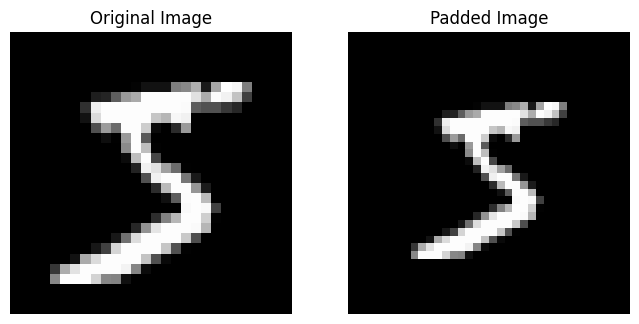

In [19]:
# Select the first example from the dataset
image = train_images[0]
image = np.expand_dims(image, axis=-1)  # Add channel dimension

# Print the original image shape
print("Original Image Shape:", image.shape)

# Define the amount of padding for each dimension
pad_height = 4
pad_width = 4

# Pad the image using tf.pad
padded_image = tf.pad(image, paddings=[[pad_height, pad_height], [pad_width, pad_width], [0, 0]])

# Print the padded image shape
print("Padded Image Shape:", padded_image.shape)

# Plot the original and padded images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(padded_image), cmap='gray')
plt.title('Padded Image')
plt.axis('off')

plt.show()


In [20]:
[[pad_height, pad_height], [pad_width, pad_width], [0, 0]]  # paddings

[[4, 4], [4, 4], [0, 0]]

### Padding and Striding
- ефекти меж та доповнення (padding);
- обраний крок згортки (stride).

In [22]:
model_padded = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation="relu"),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])
model_padded.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# without padding

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Flatten

Original Image Shape: (28, 28, 1)
Flattened Image Shape: (784,)


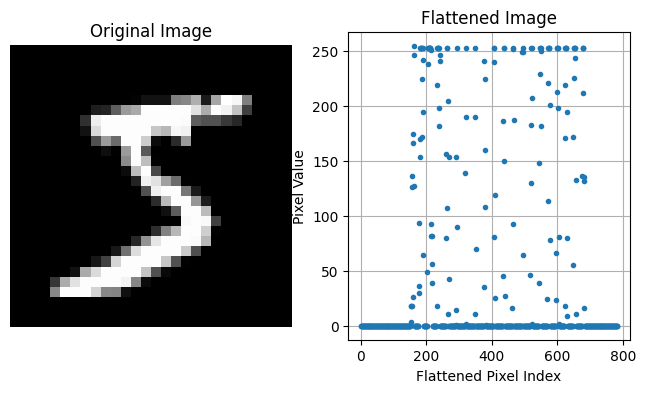

In [24]:
# Select the first example from the dataset
image = train_images[0]
image = np.expand_dims(image, axis=-1)  # Add channel dimension

# Print the original image shape
print("Original Image Shape:", image.shape)

# Flatten the image using tf.reshape
flattened_image = tf.reshape(image, shape=(-1,))  # 28x28=784

# Print the flattened image shape
print("Flattened Image Shape:", flattened_image.shape)

# Plot the original and flattened images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(flattened_image.numpy(), marker='.', linestyle='None')
plt.title('Flattened Image')
plt.xlabel('Flattened Pixel Index')
plt.ylabel('Pixel Value')
plt.grid(True)

plt.show()


In [25]:
flattened_image.numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0,   0,   0,   0

## Train the final model

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8978 - loss: 0.3263 - val_accuracy: 0.9854 - val_loss: 0.0455
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9851 - loss: 0.0473 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9886 - val_loss: 0.0340
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9910 - loss: 0.0256 - val_accuracy: 0.9890 - val_loss: 0.0356
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9916 - val_loss: 0.0297
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9912 - val_loss: 0.0320
This took 465.1230478286743 seconds to run.


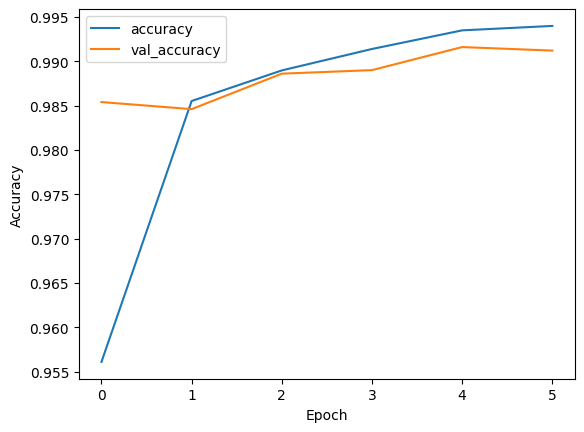

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import time

# Load a dataset (e.g., CIFAR-10 for simplicity)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple CNN model
from keras import layers
from keras import models


## TODO compare CPU and GPU

time_start = time.time()

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Visualize the model architecture
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(train_images, train_labels, epochs=6, validation_data=(test_images, test_labels))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

# Visualize the training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0422
Test Accuracy: 0.9911999702453613


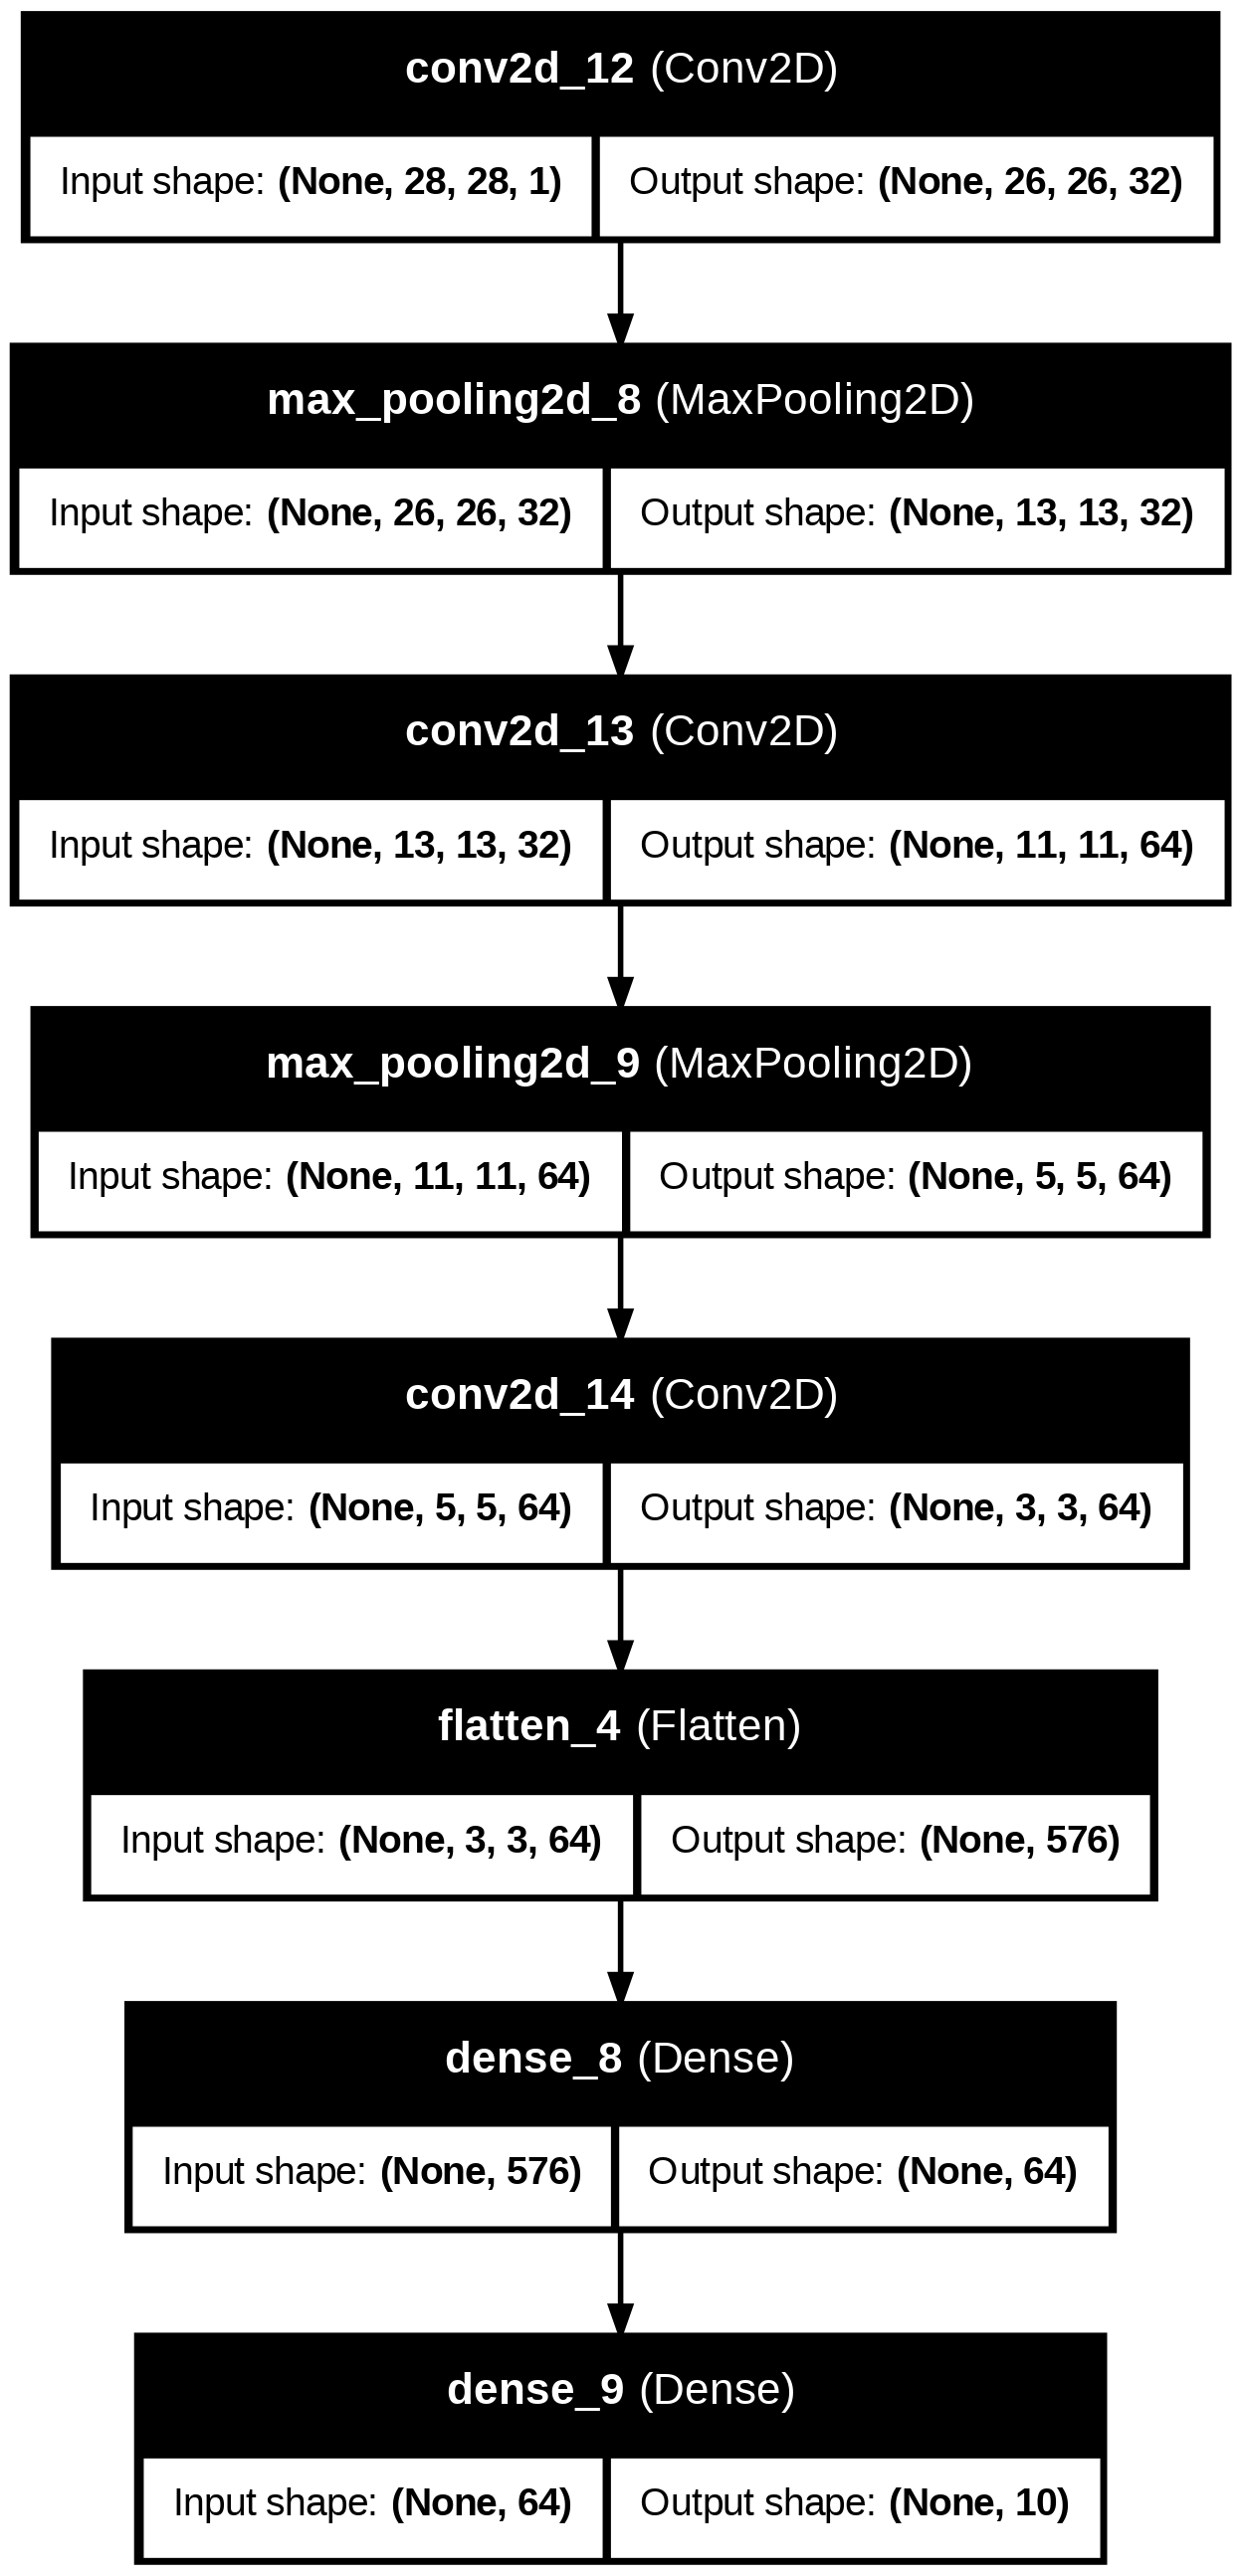

In [28]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

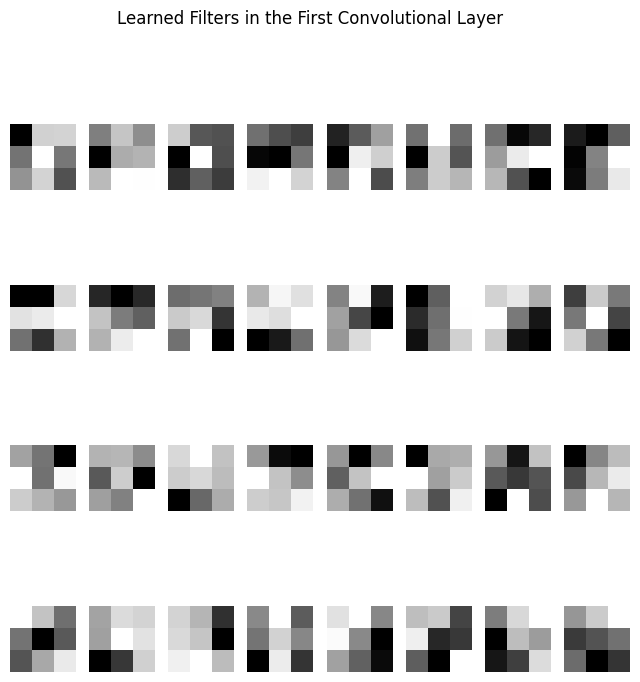

In [30]:
# Extract the filters from the first convolutional layer
filters = model.layers[0].get_weights()[0]

# Visualize the learned filters
# Learned Filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing different features.

plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters in the First Convolutional Layer')
plt.show()


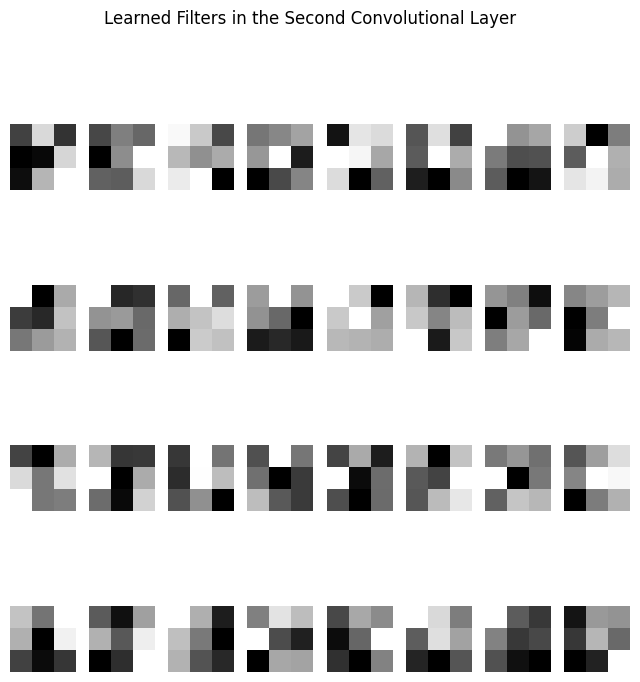

In [31]:
# Extract the filters from the second convolutional layer
filters_2 = model.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned Filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing different features.

plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_2[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters in the Second Convolutional Layer')
plt.show()

In [32]:
filters

array([[[[-0.422, -0.0817, 0.0674, -0.037, -0.216, 0.0104, -0.0184, -0.238, -0.271, -0.226, 0.0138, 0.0199, 0.0228, -0.241, 0.142, -0.159, 0.00489, 0.0271, 0.0728, -0.0149, 0.0284, -0.212, 0.0477, -0.285, 0.397, -0.0126, 0.14, -0.0127, 0.18, 0.108, -0.0574, 0.0442]],

        [[0.119, 0.0515, -0.0289, -0.101, -0.098, 0.1, -0.129, -0.3, -0.271, -0.314, 0.0187, 0.159, 0.143, -0.0859, 0.18, 0.158, -0.0595, 0.0289, 0.114, -0.319, -0.3, 0.0157, -0.0194, -0.065, 0.147, 0.0904, 0.0451, 0.112, 0.238, 0.144, 0.153, 0.181]],

        [[0.123, -0.0539, -0.0342, -0.131, 0.0436, 0.00668, -0.0951, -0.0845, 0.121, -0.22, 0.0266, 0.114, -0.0821, 0.174, 0.0755, -0.0248, -0.225, -0.013, 0.0498, -0.343, -0.0044, 0.0217, 0.0698, 0.0223, -0.201, 0.0777, -0.349, -0.0609, 0.0113, -0.244, 0.243, 0.318]]],


       [[[-0.124, -0.325, -0.101, -0.237, -0.288, -0.0624, 0.0278, -0.292, 0.141, 0.141, 0.0752, 0.133, 0.053, -0.169, 0.225, -0.0286, 0.138, -0.0648, 0.0596, 0.204, -0.0907, 0.131, 0.0157, -0.165, -0.184,